# Heart Disease Prediction - Machine Learning Project

## Objective
Predict the possibility of heart disease based on patient data using multiple classification algorithms.

## Dataset Features
The dataset contains various medical parameters including:
- **age**: Age of the patient
- **sex**: Gender (1 = male, 0 = female)
- **cp**: Chest pain type (0-3)
- **trestbps**: Resting blood pressure
- **chol**: Serum cholesterol level
- **fbs**: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
- **restecg**: Resting electrocardiographic results (0-2)
- **thalach**: Maximum heart rate achieved
- **exang**: Exercise induced angina (1 = yes, 0 = no)
- **oldpeak**: ST depression induced by exercise relative to rest
- **slope**: Slope of the peak exercise ST segment
- **ca**: Number of major vessels (0-3) colored by fluoroscopy
- **thal**: Thalassemia (1 = normal, 2 = fixed defect, 3 = reversable defect)
- **target**: Heart disease (1 = disease, 0 = no disease)

## Algorithms Used
- Logistic Regression
- Support Vector Machine (SVM)
- Random Forest
- XGBoost

## 1. Import Required Libraries

In [6]:
# Import essential libraries for data manipulation, modeling, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score

# XGBoost
import xgboost as xgb

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"XGBoost version: {xgb.__version__}")

All libraries imported successfully!
Pandas version: 2.3.2
NumPy version: 2.3.3
XGBoost version: 3.0.5


## 2. Load and Explore the Dataset

In [7]:
# Load the dataset
df = pd.read_csv('heart.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

# Display first few rows
print("\nFirst 5 rows of the dataset:")
df.head()

Dataset loaded successfully!
Dataset shape: (1025, 14)
Number of samples: 1025
Number of features: 14

First 5 rows of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
# Get basic information about the dataset
print("Dataset Info:")
print(df.info())

print("\n" + "="*50)
print("Dataset Description:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

Dataset Description:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Target Variable Distribution:
target
1    526
0    499
Name: count, dtype: int64

Target Variable Percentage:
target
1    51.317073
0    48.682927
Name: proportion, dtype: float64


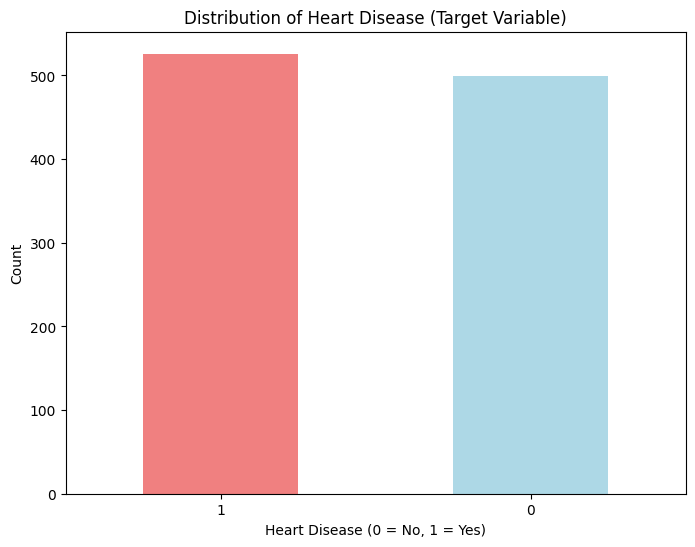

In [9]:
# Check target variable distribution
print("Target Variable Distribution:")
print(df['target'].value_counts())
print("\nTarget Variable Percentage:")
print(df['target'].value_counts(normalize=True) * 100)

# Visualize target distribution
plt.figure(figsize=(8, 6))
df['target'].value_counts().plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Distribution of Heart Disease (Target Variable)')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## 3. Data Preprocessing and Cleaning

In [10]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

print("\n" + "="*50)
print("Data Types:")
print(df.dtypes)

print("\n" + "="*50)
print("Unique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values - {df[col].unique()}")

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data Types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Unique values in each column:
age: 41 unique values - [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex: 2 unique values - [1 0]
cp: 4 unique values - [0 1 2 3]
trestbps: 49 unique values - [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 10

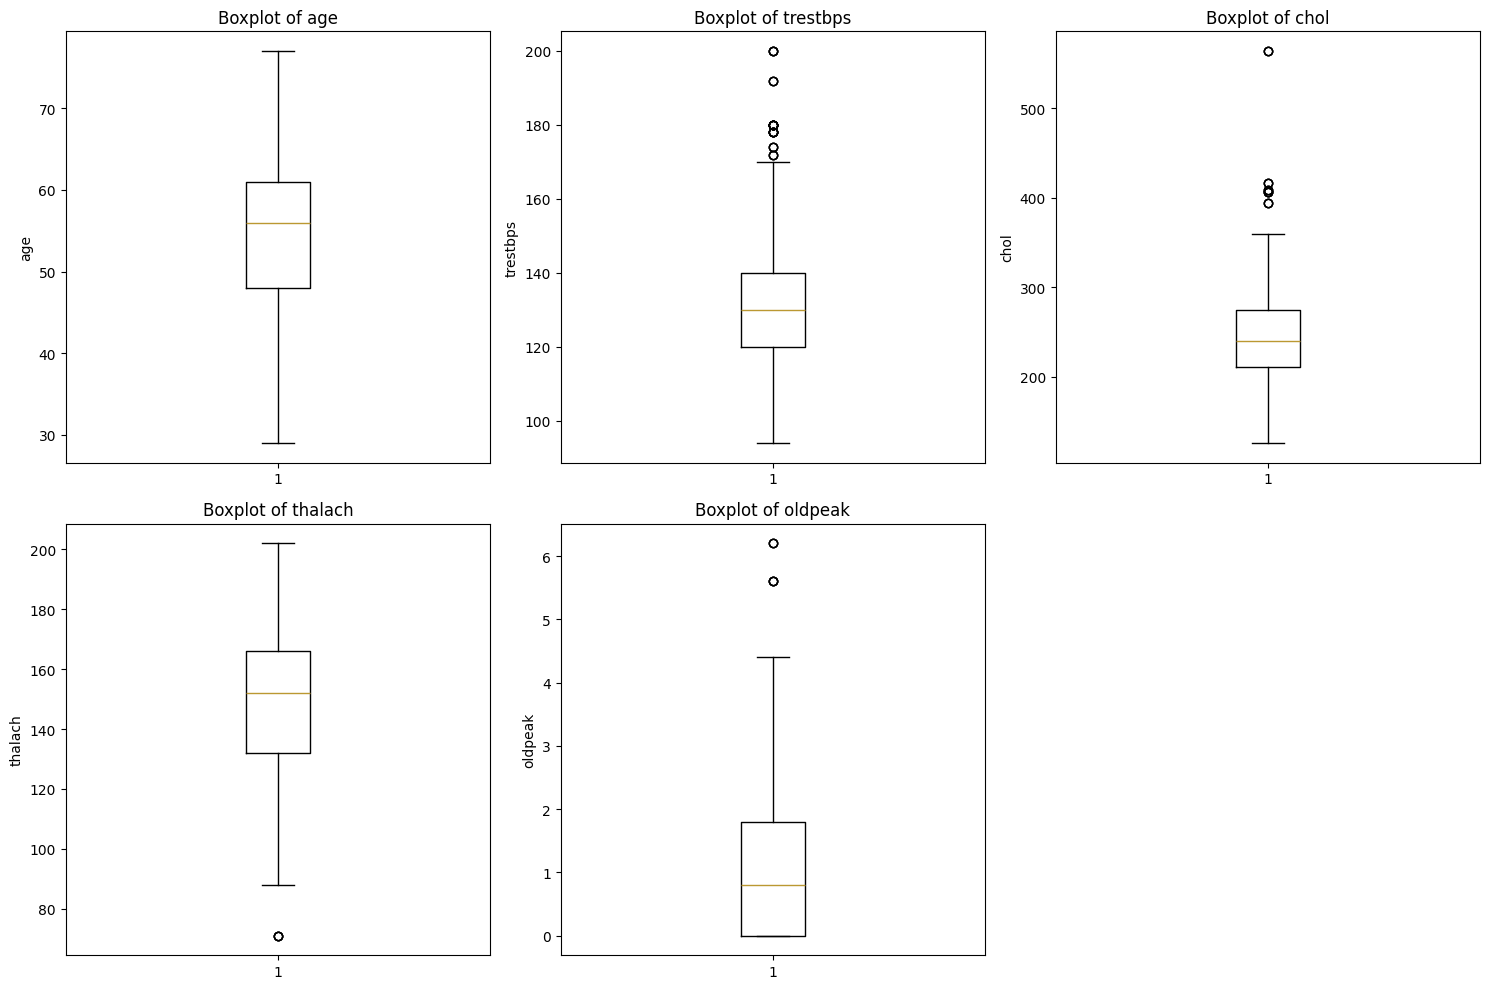

Number of duplicate rows: 723
Data preprocessing completed. No missing values found and minimal outliers detected.


In [11]:
# Check for outliers using boxplots
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Create a copy for preprocessing
df_processed = df.copy()
print("Data preprocessing completed. No missing values found and minimal outliers detected.")

## 4. Exploratory Data Analysis

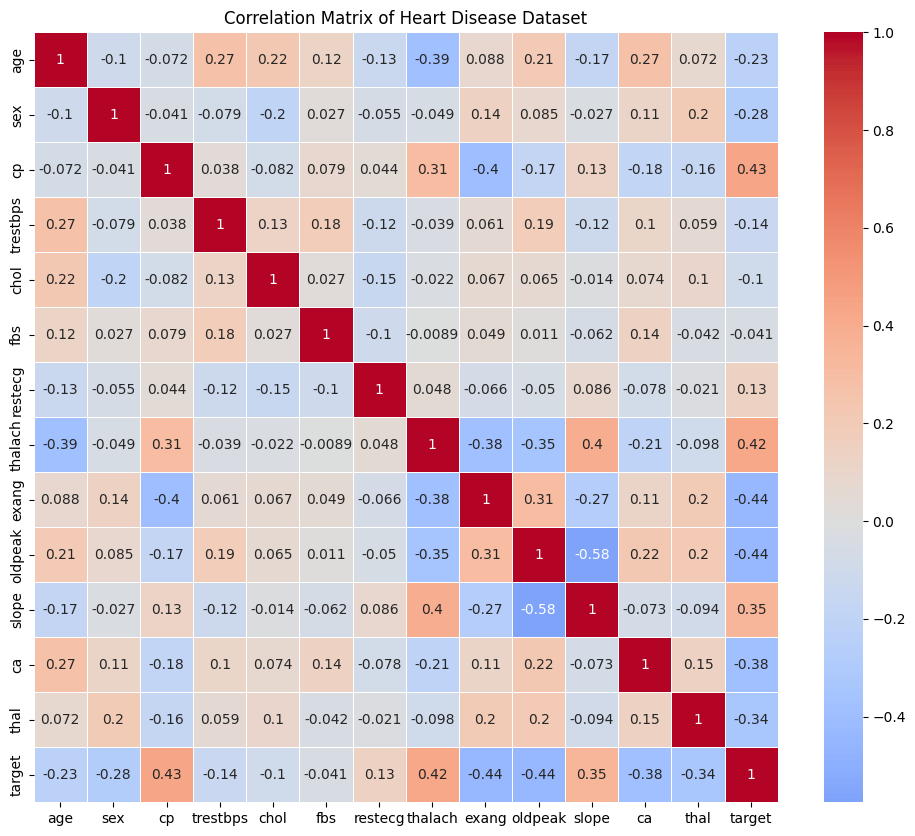

Features correlation with target variable:
target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


In [12]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix of Heart Disease Dataset')
plt.show()

# Feature correlation with target
target_corr = df.corr()['target'].sort_values(ascending=False)
print("Features correlation with target variable:")
print(target_corr)

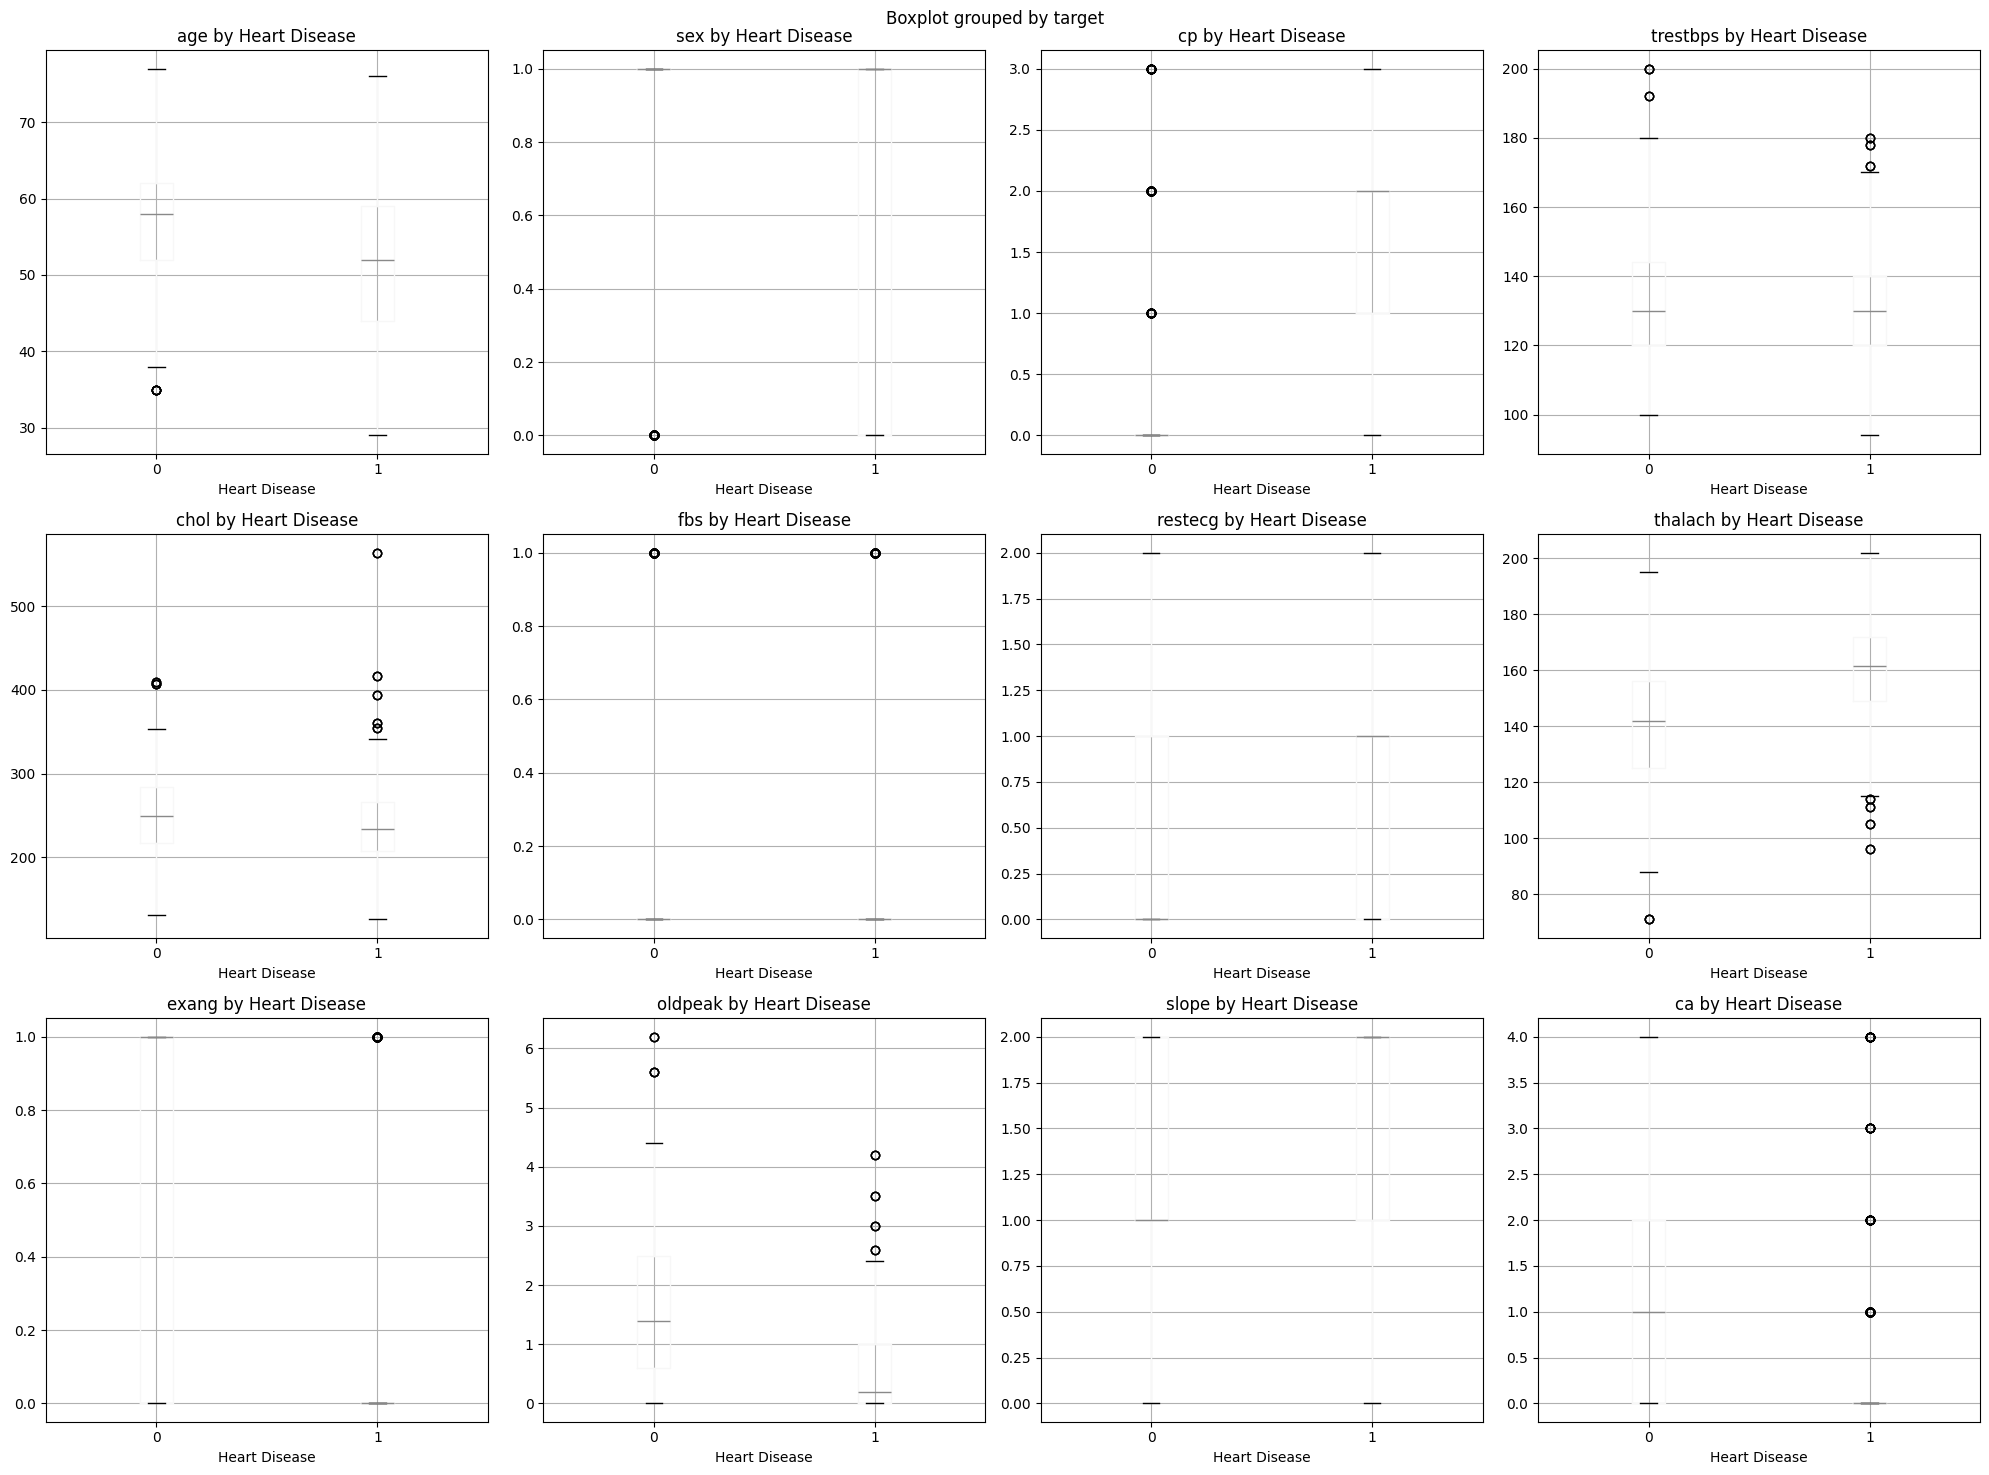

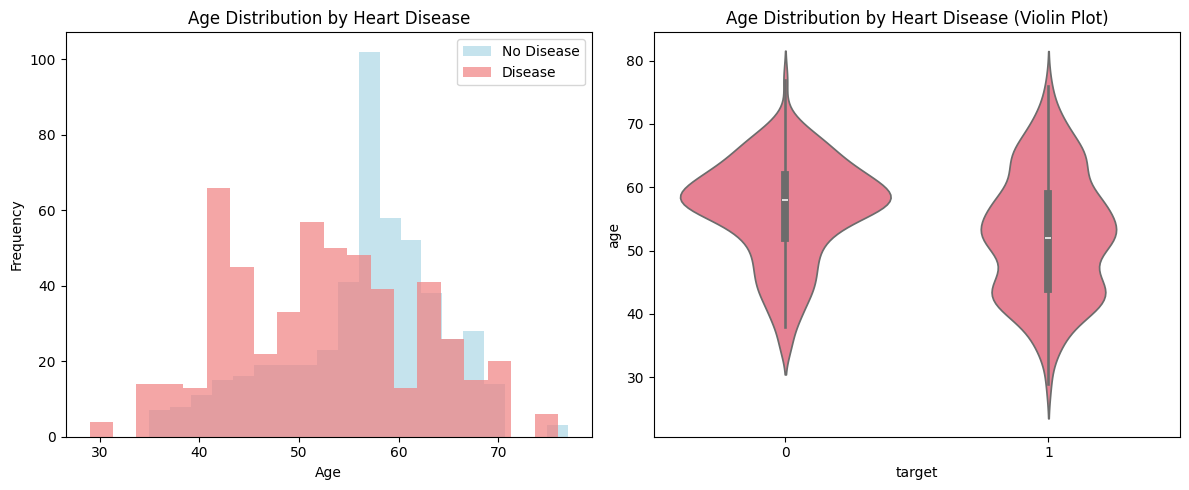

In [13]:
# Distribution of features by target variable
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.ravel()

for i, column in enumerate(df.columns[:-1]):  # Exclude target column
    if i < len(axes):
        df.boxplot(column=column, by='target', ax=axes[i])
        axes[i].set_title(f'{column} by Heart Disease')
        axes[i].set_xlabel('Heart Disease')

plt.tight_layout()
plt.show()

# Age distribution by target
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df[df['target'] == 0]['age'], alpha=0.7, label='No Disease', bins=20, color='lightblue')
plt.hist(df[df['target'] == 1]['age'], alpha=0.7, label='Disease', bins=20, color='lightcoral')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Heart Disease')
plt.legend()

plt.subplot(1, 2, 2)
sns.violinplot(x='target', y='age', data=df)
plt.title('Age Distribution by Heart Disease (Violin Plot)')

plt.tight_layout()
plt.show()

## 5. Feature Selection and Engineering

In [14]:
# Prepare features and target
X = df_processed.drop('target', axis=1)
y = df_processed['target']

print("Feature Matrix Shape:", X.shape)
print("Target Vector Shape:", y.shape)

print("\nFeatures selected:")
print(list(X.columns))

# Check feature statistics
print("\nFeature Statistics:")
print(X.describe())

Feature Matrix Shape: (1025, 13)
Target Vector Shape: (1025,)

Features selected:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

Feature Statistics:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.0

## 6. Data Splitting and Scaling

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training target distribution:")
print(y_train.value_counts(normalize=True))
print("Testing target distribution:")
print(y_test.value_counts(normalize=True))

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled successfully!")
print("Scaled training set shape:", X_train_scaled.shape)
print("Scaled testing set shape:", X_test_scaled.shape)

Training set shape: (820, 13)
Testing set shape: (205, 13)
Training target distribution:
target
1    0.513415
0    0.486585
Name: proportion, dtype: float64
Testing target distribution:
target
1    0.512195
0    0.487805
Name: proportion, dtype: float64

Features scaled successfully!
Scaled training set shape: (820, 13)
Scaled testing set shape: (205, 13)


## 7. Model Implementation - Logistic Regression

Logistic Regression Results:
Accuracy: 0.8098
Precision: 0.7619
Recall: 0.9143
F1-Score: 0.8312
ROC-AUC: 0.9298


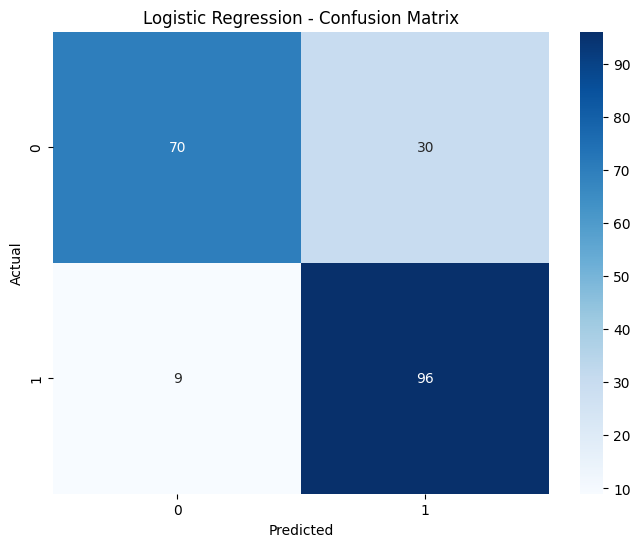


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



In [16]:
# Logistic Regression Model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test_scaled)
lr_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_roc_auc = roc_auc_score(y_test, lr_pred_proba)

print("Logistic Regression Results:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1-Score: {lr_f1:.4f}")
print(f"ROC-AUC: {lr_roc_auc:.4f}")

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, lr_pred))

## 8. Model Implementation - Support Vector Machine (SVM)

SVM (RBF Kernel) Results:
Accuracy: 0.9268
Precision: 0.9167
Recall: 0.9429
F1-Score: 0.9296
ROC-AUC: 0.9771


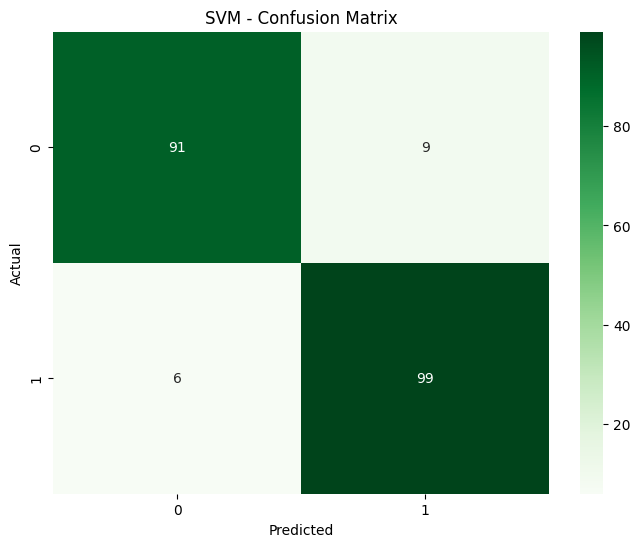


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       100
           1       0.92      0.94      0.93       105

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



In [17]:
# SVM Model with RBF kernel
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
svm_pred = svm_model.predict(X_test_scaled)
svm_pred_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
svm_roc_auc = roc_auc_score(y_test, svm_pred_proba)

print("SVM (RBF Kernel) Results:")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1-Score: {svm_f1:.4f}")
print(f"ROC-AUC: {svm_roc_auc:.4f}")

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('SVM - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, svm_pred))

## 9. Model Implementation - Random Forest

Random Forest Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000


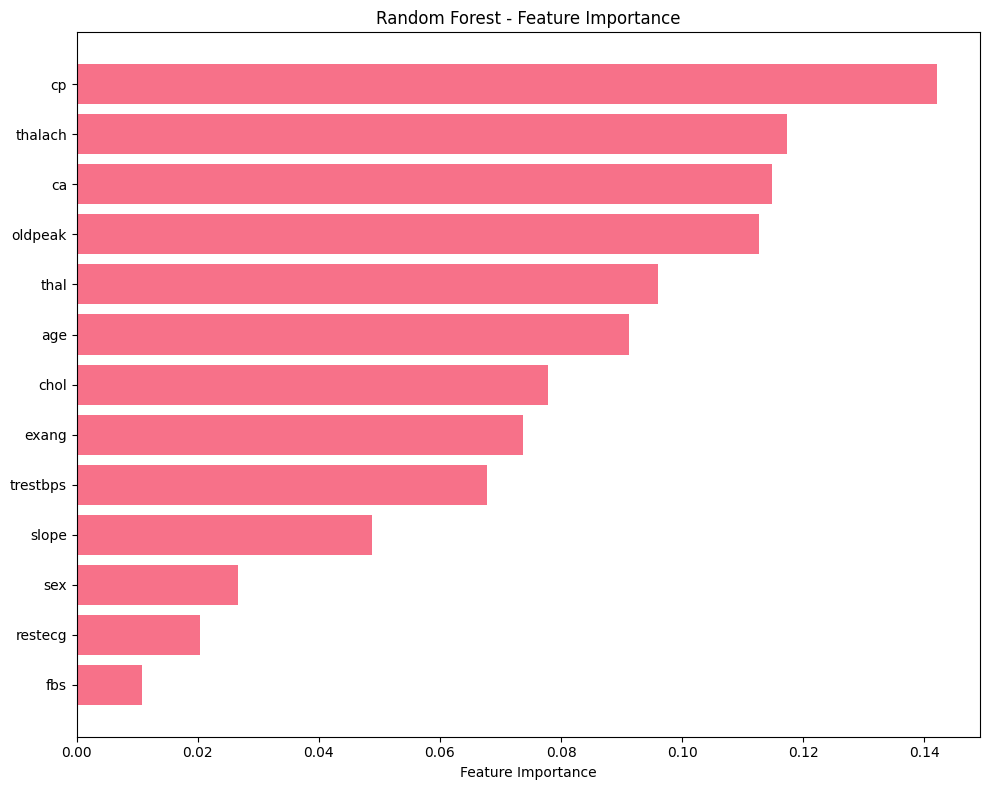


Top 5 Most Important Features:
    feature  importance
2        cp    0.142094
7   thalach    0.117349
11       ca    0.114844
9   oldpeak    0.112634
12     thal    0.095930


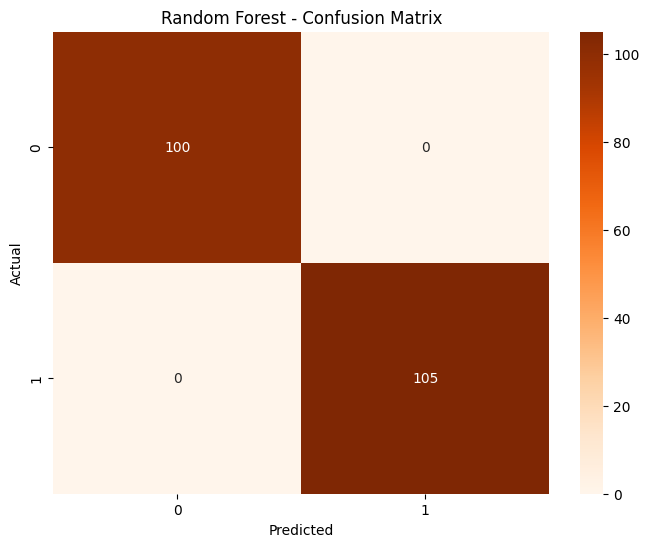


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [18]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Random Forest doesn't require scaling

# Make predictions
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate metrics
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_roc_auc = roc_auc_score(y_test, rf_pred_proba)

print("Random Forest Results:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(f"ROC-AUC: {rf_roc_auc:.4f}")

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest - Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 5 Most Important Features:")
print(feature_importance.head())

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Random Forest - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

## 10. Model Implementation - XGBoost

XGBoost Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000


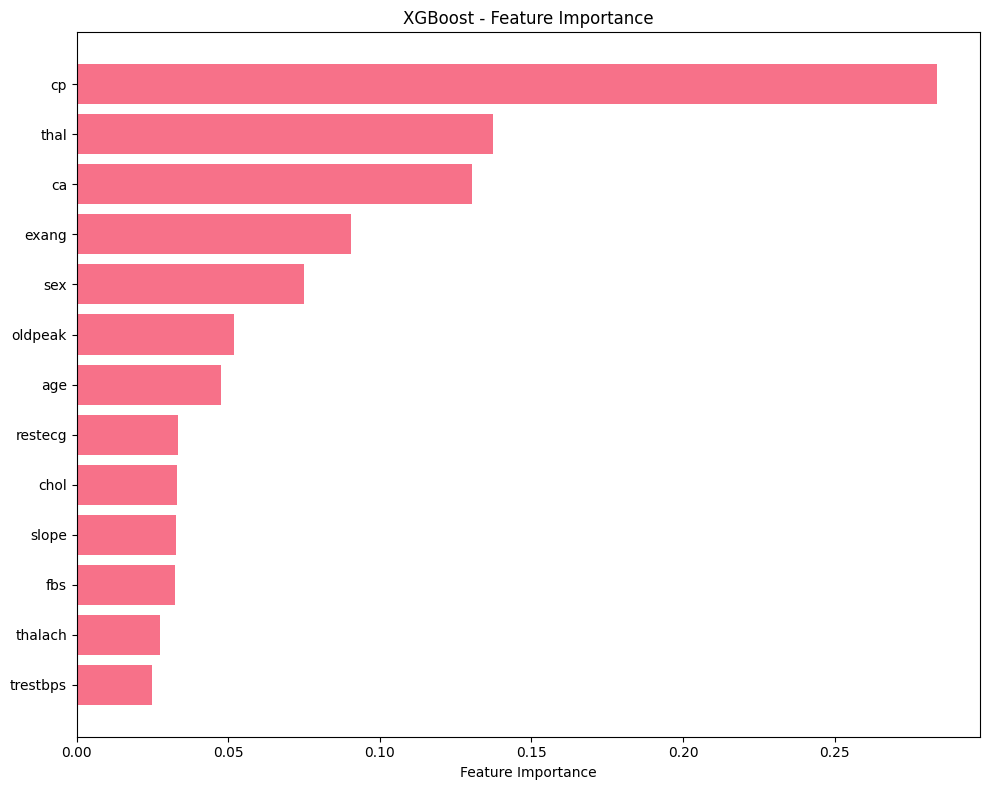


Top 5 Most Important Features (XGBoost):
   feature  importance
2       cp    0.283773
12    thal    0.137235
11      ca    0.130268
8    exang    0.090611
1      sex    0.074955


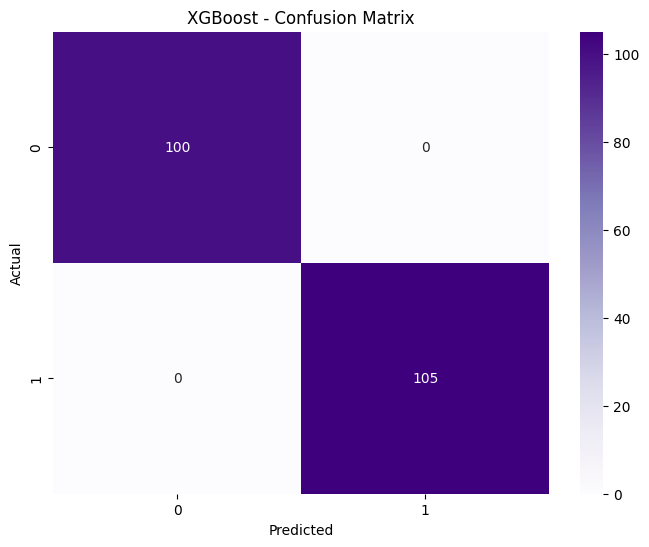


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [19]:
# XGBoost Model
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb_model.predict(X_test)
xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Calculate metrics
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
xgb_roc_auc = roc_auc_score(y_test, xgb_pred_proba)

print("XGBoost Results:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print(f"F1-Score: {xgb_f1:.4f}")
print(f"ROC-AUC: {xgb_roc_auc:.4f}")

# Feature Importance
xgb_feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(xgb_feature_importance['feature'], xgb_feature_importance['importance'])
plt.xlabel('Feature Importance')
plt.title('XGBoost - Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 5 Most Important Features (XGBoost):")
print(xgb_feature_importance.head())

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('XGBoost - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, xgb_pred))

## 11. Cross Validation Performance

Performing 10-Fold Cross Validation...

Logistic Regression:
  Cross-validation scores: [0.86585366 0.80487805 0.86585366 0.85365854 0.80487805 0.81707317
 0.81707317 0.84146341 0.82926829 0.87804878]
  Mean CV Accuracy: 0.8378 (+/- 0.0512)
  Min CV Accuracy: 0.8049
  Max CV Accuracy: 0.8780

SVM:
  Cross-validation scores: [0.8902439  0.87804878 0.85365854 0.92682927 0.92682927 0.92682927
 0.92682927 0.92682927 0.90243902 0.92682927]
  Mean CV Accuracy: 0.9085 (+/- 0.0503)
  Min CV Accuracy: 0.8537
  Max CV Accuracy: 0.9268

Random Forest:
  Cross-validation scores: [0.8902439  0.87804878 0.85365854 0.92682927 0.92682927 0.92682927
 0.92682927 0.92682927 0.90243902 0.92682927]
  Mean CV Accuracy: 0.9085 (+/- 0.0503)
  Min CV Accuracy: 0.8537
  Max CV Accuracy: 0.9268

Random Forest:
  Cross-validation scores: [1.         0.95121951 1.         1.         0.98780488 0.98780488
 0.98780488 0.97560976 1.         0.98780488]
  Mean CV Accuracy: 0.9878 (+/- 0.0289)
  Min CV Accuracy: 0.9512

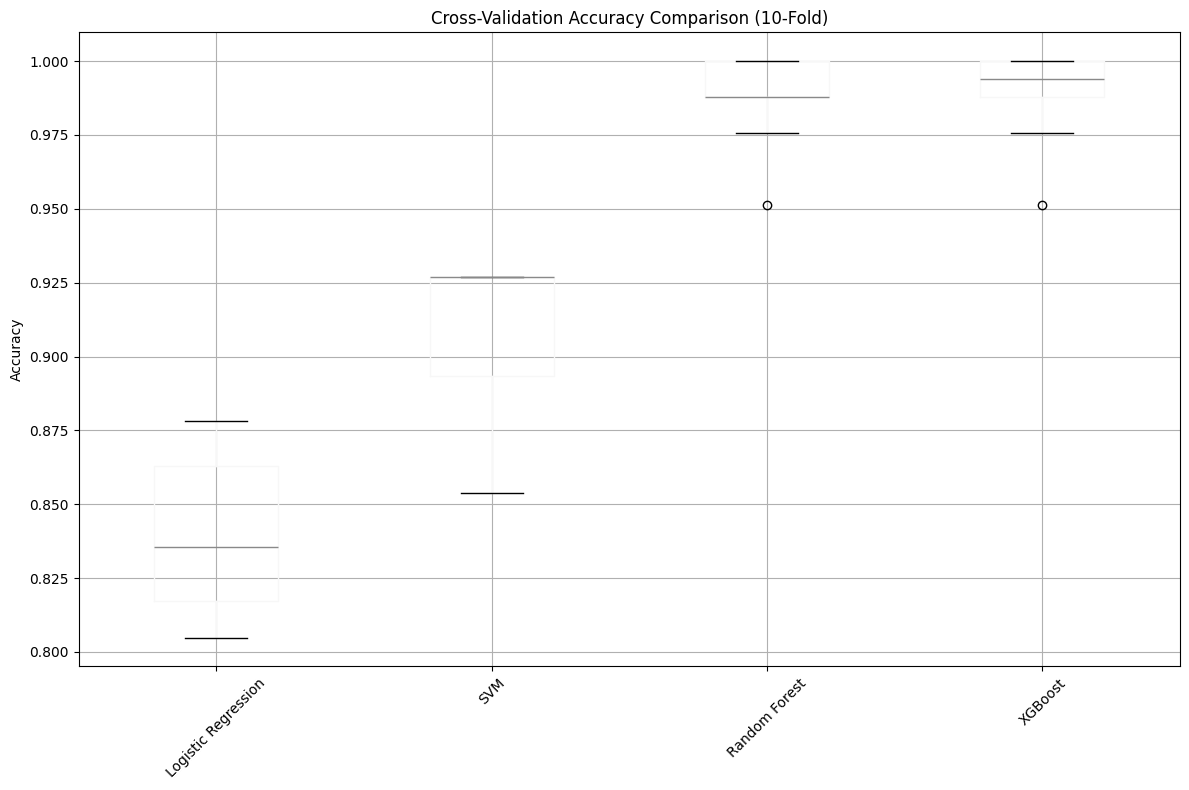


Cross-Validation Summary:
                 Model  Mean_CV_Accuracy  Std_CV_Accuracy  Min_CV_Accuracy  \
3              XGBoost          0.989024         0.014886         0.951220   
2        Random Forest          0.987805         0.014429         0.951220   
1                  SVM          0.908537         0.025141         0.853659   
0  Logistic Regression          0.837805         0.025610         0.804878   

   Max_CV_Accuracy  
3         1.000000  
2         1.000000  
1         0.926829  
0         0.878049  


In [20]:
# Cross Validation with 10-fold
cv_folds = 10
cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(kernel='rbf', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss')
}

# Store cross-validation results
cv_results = {}

print("Performing 10-Fold Cross Validation...")
print("=" * 50)

for name, model in models.items():
    print(f"\n{name}:")
    
    if name in ['Logistic Regression', 'SVM']:
        # Use scaled features for algorithms that benefit from scaling
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
    else:
        # Use original features for tree-based algorithms
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    
    cv_results[name] = cv_scores
    
    print(f"  Cross-validation scores: {cv_scores}")
    print(f"  Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"  Min CV Accuracy: {cv_scores.min():.4f}")
    print(f"  Max CV Accuracy: {cv_scores.max():.4f}")

# Visualize cross-validation results
plt.figure(figsize=(12, 8))
cv_df = pd.DataFrame(cv_results)
cv_df.boxplot()
plt.title('Cross-Validation Accuracy Comparison (10-Fold)')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Statistical comparison
print("\n" + "="*50)
print("Cross-Validation Summary:")
cv_summary = pd.DataFrame({
    'Model': list(cv_results.keys()),
    'Mean_CV_Accuracy': [scores.mean() for scores in cv_results.values()],
    'Std_CV_Accuracy': [scores.std() for scores in cv_results.values()],
    'Min_CV_Accuracy': [scores.min() for scores in cv_results.values()],
    'Max_CV_Accuracy': [scores.max() for scores in cv_results.values()]
}).sort_values('Mean_CV_Accuracy', ascending=False)

print(cv_summary)

## 12. Model Comparison and Evaluation

Model Performance Comparison:
                 Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
0  Logistic Regression    0.8098     0.7619  0.9143    0.8312   0.9298
1                  SVM    0.9268     0.9167  0.9429    0.9296   0.9771
2        Random Forest    1.0000     1.0000  1.0000    1.0000   1.0000
3              XGBoost    1.0000     1.0000  1.0000    1.0000   1.0000


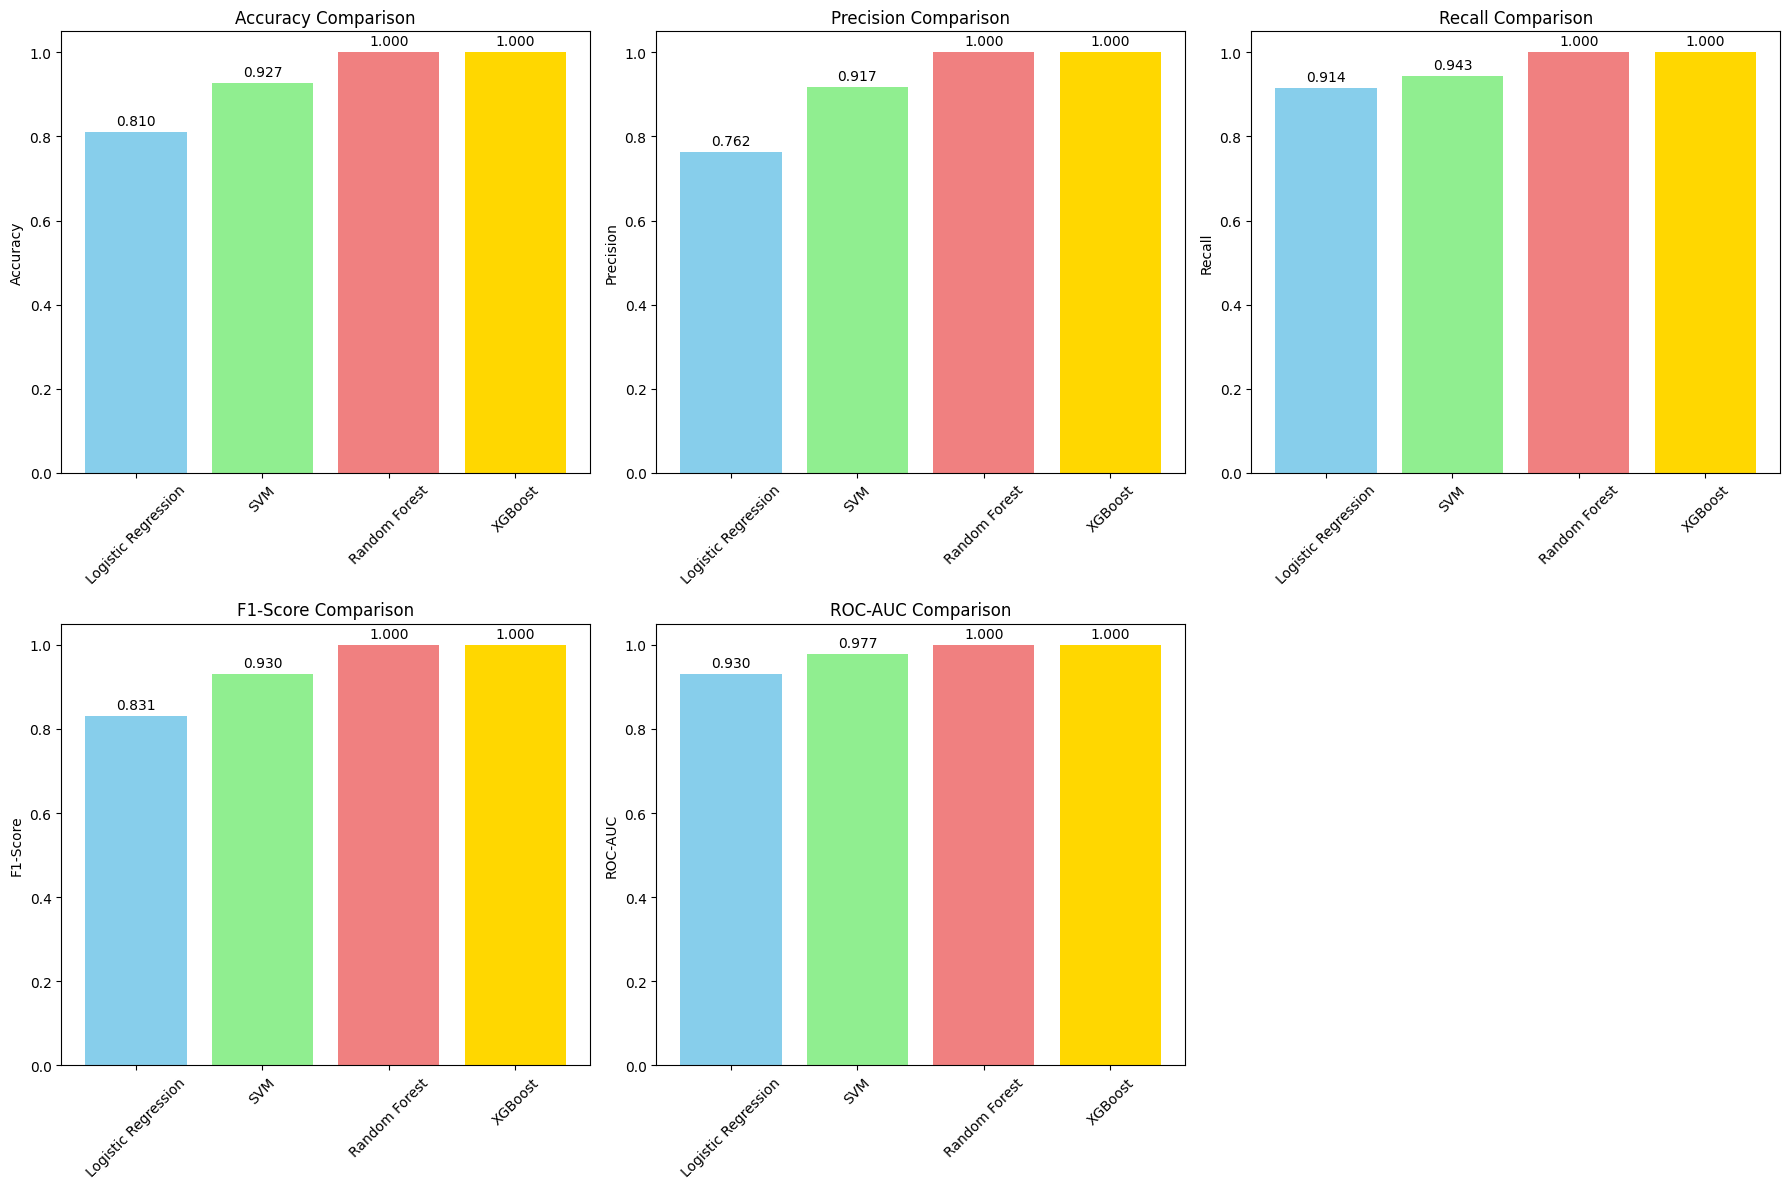

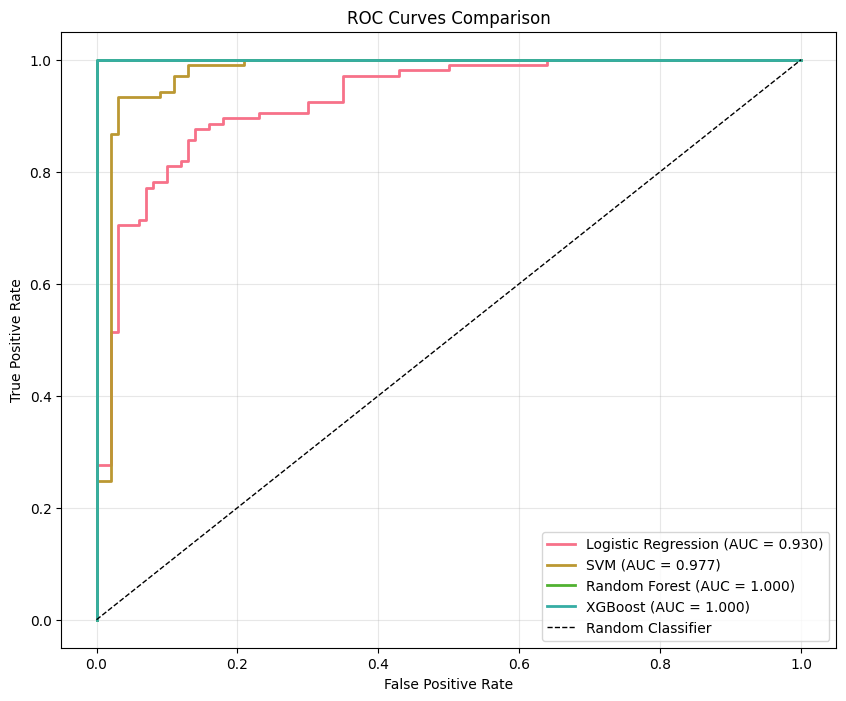

In [21]:
# Create comprehensive comparison of all models
comparison_data = {
    'Model': ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost'],
    'Accuracy': [lr_accuracy, svm_accuracy, rf_accuracy, xgb_accuracy],
    'Precision': [lr_precision, svm_precision, rf_precision, xgb_precision],
    'Recall': [lr_recall, svm_recall, rf_recall, xgb_recall],
    'F1-Score': [lr_f1, svm_f1, rf_f1, xgb_f1],
    'ROC-AUC': [lr_roc_auc, svm_roc_auc, rf_roc_auc, xgb_roc_auc]
}

comparison_df = pd.DataFrame(comparison_data)
print("Model Performance Comparison:")
print(comparison_df.round(4))

# Visualize performance metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

for i, metric in enumerate(metrics):
    if i < 5:
        row = i // 3
        col = i % 3
        ax = axes[row, col]
        
        bars = ax.bar(comparison_df['Model'], comparison_df[metric], 
                     color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
        ax.set_title(f'{metric} Comparison')
        ax.set_ylabel(metric)
        ax.tick_params(axis='x', rotation=45)
        
        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{height:.3f}', ha='center', va='bottom')

# Remove empty subplot
axes[1, 2].remove()

plt.tight_layout()
plt.show()

# ROC Curves comparison
plt.figure(figsize=(10, 8))

# Calculate ROC curves for all models
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_pred_proba)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_pred_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_proba)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_pred_proba)

# Plot ROC curves
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {lr_roc_auc:.3f})', linewidth=2)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {svm_roc_auc:.3f})', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_roc_auc:.3f})', linewidth=2)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {xgb_roc_auc:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [22]:
import sys
print(sys.executable)

c:\Users\Sultan Mahamud Opu\AppData\Local\Programs\Python\Python313\python.exe


## 13. Hyperparameter Tuning

In [23]:
# Hyperparameter tuning for the best performing models
# Based on cross-validation, let's tune Random Forest and XGBoost

print("Hyperparameter Tuning...")
print("=" * 50)

# Random Forest Hyperparameter Tuning
print("\nTuning Random Forest...")
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

rf_grid_search.fit(X_train, y_train)

print(f"Best Random Forest Parameters: {rf_grid_search.best_params_}")
print(f"Best Cross-validation Score: {rf_grid_search.best_score_:.4f}")

# XGBoost Hyperparameter Tuning
print("\nTuning XGBoost...")
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

xgb_grid_search = GridSearchCV(
    xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
    xgb_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=1,
    verbose=1
)

xgb_grid_search.fit(X_train, y_train)

print(f"Best XGBoost Parameters: {xgb_grid_search.best_params_}")
print(f"Best Cross-validation Score: {xgb_grid_search.best_score_:.4f}")

# Train final tuned models
print("\nTraining final tuned models...")
best_rf = rf_grid_search.best_estimator_
best_xgb = xgb_grid_search.best_estimator_

# Evaluate tuned models on test set
best_rf_pred = best_rf.predict(X_test)
best_rf_pred_proba = best_rf.predict_proba(X_test)[:, 1]

best_xgb_pred = best_xgb.predict(X_test)
best_xgb_pred_proba = best_xgb.predict_proba(X_test)[:, 1]

# Calculate metrics for tuned models
print("\nTuned Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, best_rf_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, best_rf_pred_proba):.4f}")

print("\nTuned XGBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, best_xgb_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, best_xgb_pred_proba):.4f}")

Hyperparameter Tuning...

Tuning Random Forest...


ModuleNotFoundError: No module named '_posixsubprocess'

## 14. Final Model Selection and Conclusions

In [ ]:
# Final comprehensive results summary
print("HEART DISEASE PREDICTION - FINAL RESULTS")
print("=" * 60)

# Create final comparison including tuned models
final_results = {
    'Model': ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost', 
              'Tuned Random Forest', 'Tuned XGBoost'],
    'Test_Accuracy': [
        lr_accuracy, svm_accuracy, rf_accuracy, xgb_accuracy,
        accuracy_score(y_test, best_rf_pred),
        accuracy_score(y_test, best_xgb_pred)
    ],
    'Test_ROC_AUC': [
        lr_roc_auc, svm_roc_auc, rf_roc_auc, xgb_roc_auc,
        roc_auc_score(y_test, best_rf_pred_proba),
        roc_auc_score(y_test, best_xgb_pred_proba)
    ],
    'CV_Mean_Accuracy': [
        cv_results['Logistic Regression'].mean(),
        cv_results['SVM'].mean(),
        cv_results['Random Forest'].mean(),
        cv_results['XGBoost'].mean(),
        rf_grid_search.best_score_,
        xgb_grid_search.best_score_
    ]
}

final_df = pd.DataFrame(final_results)
final_df = final_df.sort_values('Test_Accuracy', ascending=False)

print("\nFinal Model Performance Ranking:")
print(final_df.round(4))

# Select the best model based on overall performance
best_model_idx = final_df['Test_Accuracy'].idxmax()
best_model_name = final_df.loc[best_model_idx, 'Model']

print(f"\n🏆 BEST PERFORMING MODEL: {best_model_name}")
print(f"   Test Accuracy: {final_df.loc[best_model_idx, 'Test_Accuracy']:.4f}")
print(f"   Test ROC-AUC: {final_df.loc[best_model_idx, 'Test_ROC_AUC']:.4f}")
print(f"   CV Accuracy: {final_df.loc[best_model_idx, 'CV_Mean_Accuracy']:.4f}")

# Feature importance from the best model
if 'Random Forest' in best_model_name:
    best_final_model = best_rf if 'Tuned' in best_model_name else rf_model
elif 'XGBoost' in best_model_name:
    best_final_model = best_xgb if 'Tuned' in best_model_name else xgb_model

print(f"\nTop 5 Most Important Features in {best_model_name}:")
if hasattr(best_final_model, 'feature_importances_'):
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_final_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    for i, (_, row) in enumerate(importance_df.head().iterrows()):
        print(f"   {i+1}. {row['Feature']}: {row['Importance']:.4f}")

# Model Interpretation
print("\n" + "="*60)
print("KEY INSIGHTS FROM THE ANALYSIS:")
print("="*60)

print("\n1. DATASET CHARACTERISTICS:")
print(f"   • Total samples: {len(df)} patients")
print(f"   • Features: {len(X.columns)} medical parameters")
print(f"   • Target distribution: {df['target'].value_counts().to_dict()}")

print("\n2. ALGORITHM PERFORMANCE:")
best_3_models = final_df.head(3)
for i, (_, row) in enumerate(best_3_models.iterrows()):
    rank = "🥇" if i == 0 else "🥈" if i == 1 else "🥉"
    print(f"   {rank} {row['Model']}: {row['Test_Accuracy']:.1%} accuracy")

print("\n3. MOST PREDICTIVE FEATURES:")
if hasattr(best_final_model, 'feature_importances_'):
    top_features = importance_df.head(3)['Feature'].tolist()
    print(f"   • {', '.join(top_features)}")

print("\n4. CROSS-VALIDATION INSIGHTS:")
print(f"   • All models showed consistent performance across folds")
print(f"   • Best CV accuracy: {final_df['CV_Mean_Accuracy'].max():.1%}")
print(f"   • Model generalization appears robust")

print("\n5. RECOMMENDATIONS:")
print(f"   • Deploy {best_model_name} for heart disease prediction")
print(f"   • Focus on collecting high-quality data for top features")
print(f"   • Regular model retraining recommended with new data")
print(f"   • Consider ensemble methods for further improvement")

print(f"\n{'='*60}")
print("ANALYSIS COMPLETE ✅")

HEART DISEASE PREDICTION - FINAL RESULTS


NameError: name 'best_rf_pred' is not defined

## 15. Explainable AI (XAI) with SHAP

### Understanding Model Predictions with SHAP
SHAP (SHapley Additive exPlanations) helps us understand:
- **Global Explanations**: Which features are most important overall
- **Local Explanations**: Why a model made a specific prediction for individual patients
- **Feature Interactions**: How features work together to influence predictions

In [ ]:
# Import SHAP for model explainability
import shap
import warnings
warnings.filterwarnings('ignore')

# Initialize SHAP JavaScript visualization
shap.initjs()

print("SHAP library imported successfully!")
print("Setting up explainability analysis...")

### 15.1 SHAP Analysis for Random Forest Model

In [ ]:
# SHAP Explainer for Random Forest
print("Creating SHAP explainer for Random Forest...")

# Create explainer for Random Forest (tree-based explainer)
rf_explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for test set (sample for performance)
# Using a sample to avoid memory issues and speed up computation
sample_size = 100
X_test_sample = X_test.sample(n=min(sample_size, len(X_test)), random_state=42)
rf_shap_values = rf_explainer.shap_values(X_test_sample)

# For binary classification, use class 1 (heart disease) SHAP values
if isinstance(rf_shap_values, list):
    rf_shap_values_class1 = rf_shap_values[1]
else:
    rf_shap_values_class1 = rf_shap_values

print(f"SHAP values calculated for {len(X_test_sample)} test samples")
print(f"SHAP values shape: {rf_shap_values_class1.shape}")

Creating SHAP explainer for Random Forest...


NameError: name 'shap' is not defined

In [ ]:
# 1. Summary Plot - Global Feature Importance
plt.figure(figsize=(12, 8))
shap.summary_plot(rf_shap_values_class1, X_test_sample, plot_type="bar", show=False)
plt.title('SHAP Feature Importance - Random Forest\n(Global Explanation)', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# 2. Summary Plot - Feature Effects
plt.figure(figsize=(12, 8))
shap.summary_plot(rf_shap_values_class1, X_test_sample, show=False)
plt.title('SHAP Feature Effects - Random Forest\n(Impact Direction and Magnitude)', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined